In [14]:
import copy
import pandas
import warnings
import subprocess
from matplotlib import pyplot as plt
import os
import sys

sys.path.insert(0, "../src")
# csv_orig_file = "../datasets/genny2/summary.csv"
# csv_new_file = "/tmp/summary.csv"

# csv_orig_file = "../datasets/genny2/summary.csv"

# csv_orig_file = "../datasets/genny2/perf_stack.csv"
# csv_new_file = "../datasets/genny2/perf_stack2.csv"

#csv_new_file = "../datasets/genny2/fle_perf_stack2_query_in.csv"

csv_new_file = "../datasets/genny2/fle_perf_stack2_query_in_scale.csv"


In [70]:

pd = pandas.read_csv(csv_orig_file)
pd

,Unnamed: 0,Task,TaskName,Experiment,Phase,Query,QueryNumber,ContentionFactor,ThreadCount,AverageLatency,...,WorkersMin,WorkersMax,LatencyMax,LatencyMin,DurationTotal,ErrorsTotal,OperationsTotal,DocumentsTotal,SizeTotal,OverheadTotal
0,0,query_es2_1_1.load.inserts,query_es2_1_1,es2,load.inserts,load,load,1,1,4.725023e+06,...,1,1,5.584152e+07,3275876.0,4.778820e+11,0.0,100000.0,100000.0,15654510.0,5.465311e+09
1,1,query_es2_1_1.q1.reads,query_es2_1_1,es2,q1.reads,fixed_10: fixed_hf,1,1,1,5.035598e+05,...,1,1,1.814034e+06,482486.0,5.402000e+09,0.0,10000.0,10000.0,3670000.0,4.787648e+11
2,2,query_es2_1_1.q2.reads,query_es2_1_1,es2,q2.reads,fixed_10: uar,2,1,1,5.041180e+05,...,1,1,6.078640e+05,487721.0,5.729999e+09,0.0,10000.0,10000.0,3691339.0,4.846271e+11
3,3,query_es2_1_1.q3.reads,query_es2_1_1,es2,q3.reads,"uar_[6,10]: uar",3,1,1,6.006323e+05,...,1,1,1.155234e+06,459291.0,6.515000e+09,0.0,10000.0,10000.0,3690675.0,4.908549e+11
4,4,query_es2_1_1.q4.reads,query_es2_1_1,es2,q4.reads,"uar_[6,10]: uar_alllow",4,1,1,6.037502e+05,...,1,1,1.115629e+06,464395.0,6.538999e+09,0.0,10000.0,10000.0,3691568.0,4.980353e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,155,query_es3_16_16.load.inserts,query_es3_16_16,es3,load.inserts,load,load,16,16,1.528021e+07,...,16,16,5.106904e+09,4356764.0,9.992100e+10,0.0,100000.0,100000.0,15654510.0,1.742014e+11
156,156,query_es3_16_16.q1.reads,query_es3_16_16,es3,q1.reads,fixed_1: fixed_hf,1,16,16,2.414483e+07,...,16,16,7.874327e+07,11724540.0,1.522500e+10,0.0,10000.0,10000.0,3580000.0,1.777720e+12
157,157,query_es3_16_16.q2.reads,query_es3_16_16,es3,q2.reads,fixed_1: uar,2,16,16,1.268091e+07,...,16,16,2.062203e+08,5322143.0,8.204000e+09,0.0,10000.0,10000.0,3675014.0,2.024256e+12
158,158,query_es3_16_16.q3.reads,query_es3_16_16,es3,q3.reads,"uar_[1,5]: uar",3,16,16,9.911334e+06,...,16,16,2.282646e+08,503707.0,6.458999e+09,0.0,10000.0,10000.0,3677522.0,2.165754e+12


<AxesSubplot: title={'center': 'NEW ES2 Load: Average Latency'}, xlabel='ContentionFactor', ylabel='Average Latency'>

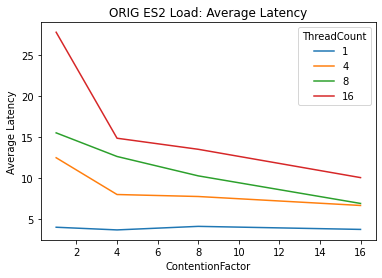

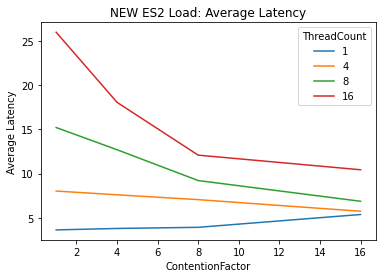

In [56]:
# Make a pivot table for average latency for load and graph it
query = "QueryNumber == 'load' & Experiment == 'es2'"

pd_orig = pandas.read_csv(csv_orig_file)

# un_pd1_orig = pd_orig.query("QueryNumber == 'load' & Experiment == 'es1'")
#un_piv_orig = un_pd1_orig.pivot(index='ContentionFactor', columns="ThreadCount", values="AverageLatencyMillis")

pd1_orig = pd_orig.query(query)
piv_orig = pd1_orig.pivot(index='ContentionFactor', columns="ThreadCount", values="AverageLatencyMillis")

pd_new = pandas.read_csv(csv_new_file)
pd1_new = pd_new.query(query)
piv_new = pd1_new.pivot(index='ContentionFactor', columns="ThreadCount", values="AverageLatencyMillis")


# un_pd1_orig.plot(title="ORIG ES1 Load: Average Latency", ylabel="Average Latency")

piv_orig.plot(title="ORIG ES2 Load: Average Latency", ylabel="Average Latency")
piv_new.plot(title="NEW ES2 Load: Average Latency", ylabel="Average Latency")


TypeError: no numeric data to plot

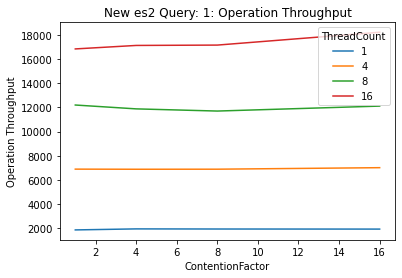

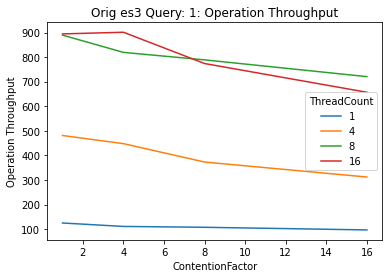

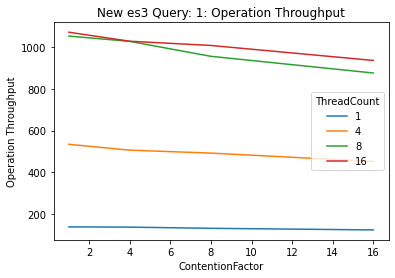

In [71]:
def plot_operation_throughput(file_name, title, query, experiment):
    # Make a pivot table for operation throughput for query and graph it
    pd = pandas.read_csv(file_name)
    pd1 = pd.query(f"QueryNumber == '{query}' & Experiment == '{experiment}'")
    piv = pd1.pivot(index='ContentionFactor', columns="ThreadCount", values="OperationThroughput")

    piv.plot(title=f"{title} {experiment} Query: {query}: Operation Throughput", ylabel="Operation Throughput")

# plot_operation_throughput(csv_orig_file, "Orig", "load", "es1")
# plot_operation_throughput(csv_orig_file, "Orig", "load", "es2")
# plot_operation_throughput(csv_new_file, "New", "load", "es2")

plot_operation_throughput(csv_new_file, "New", "1", "es2")
plot_operation_throughput(csv_orig_file, "Orig", "1", "es3")
plot_operation_throughput(csv_new_file, "New", "1", "es3")
plot_operation_throughput(csv_new_file, "New", "5", "es2")
plot_operation_throughput(csv_new_file, "New", "6", "es2")

# plot_operation_throughput(csv_orig_file, "Baseline", "1", "es2")
# plot_operation_throughput(csv_orig_file, "Baseline", "1", "es3")
# plot_operation_throughput(csv_new_file, "New", "5", "es2")
# plot_operation_throughput(csv_new_file, "New", "6", "es2")

In [19]:
def plot_operation_throughput(file_name, title, query, experiment):
    # Make a pivot table for operation throughput for query and graph it
    pd = pandas.read_csv(file_name)
    pd1 = pd.query(f"QueryNumber == '{query}' & Experiment == '{experiment}'")
    piv = pd1.pivot(index='ContentionFactor', columns="ThreadCount", values="OperationThroughput")

    piv.plot(title=f"{title} {experiment} Query: {query}: Operation Throughput", ylabel="Operation Throughput")

query = "7"
experiment = "es2"
pd = pandas.read_csv(csv_new_file)
pd1 = pd.query(f"(QueryNumber == '2' or QueryNumber == '3') & Experiment == '{experiment}'")
piv = pd1
#piv = pd1.pivot(index='ContentionFactor', columns="ThreadCount", values="OperationThroughput")
piv
# plot_operation_throughput(csv_new_file, "New", "1", "es2")
# plot_operation_throughput(csv_new_file, "New", "2", "es2")
# plot_operation_throughput(csv_new_file, "New", "3", "es2")
# plot_operation_throughput(csv_new_file, "New", "4", "es2")
# plot_operation_throughput(csv_new_file, "New", "5", "es2")
# plot_operation_throughput(csv_new_file, "New", "6", "es2")
# plot_operation_throughput(csv_new_file, "New", "7", "es2")
# plot_operation_throughput(csv_new_file, "New", "8", "es2")
# plot_operation_throughput(csv_new_file, "New", "9", "es2")
# plot_operation_throughput(csv_new_file, "New", "10", "es2")

,Unnamed: 0,Task,TaskName,Experiment,Phase,Query,QueryNumber,ContentionFactor,ThreadCount,AverageLatency,...,WorkersMin,WorkersMax,LatencyMax,LatencyMin,DurationTotal,ErrorsTotal,OperationsTotal,DocumentsTotal,SizeTotal,OverheadTotal
2,2,query_es2_1_1.q2.reads,query_es2_1_1,es2,q2.reads,fixed_1: v41,2,1,1,7.642599e+05,...,1,1,936397.0,747884.0,8.011000e+09,0.0,10000.0,10000.0,3830000.0,3.750757e+11
3,3,query_es2_1_1.q3.reads,query_es2_1_1,es2,q3.reads,fixed_1: v17,3,1,1,8.767443e+05,...,1,1,1024932.0,861304.0,9.136999e+09,0.0,10000.0,10000.0,3780000.0,3.830875e+11
13,13,query_es2_1_4.q2.reads,query_es2_1_4,es2,q2.reads,fixed_1: v41,2,1,4,7.528154e+05,...,4,4,1077433.0,721754.0,1.992000e+09,0.0,10000.0,10000.0,3820000.0,8.913854e+11
14,14,query_es2_1_4.q3.reads,query_es2_1_4,es2,q3.reads,fixed_1: v17,3,1,4,8.701080e+05,...,4,4,1186487.0,834813.0,2.289999e+09,0.0,10000.0,10000.0,3810000.0,8.993511e+11
24,24,query_es2_1_8.q2.reads,query_es2_1_8,es2,q2.reads,fixed_1: v41,2,1,8,8.356654e+05,...,8,8,1719213.0,747626.0,1.132999e+09,0.0,10000.0,10000.0,3810000.0,1.772077e+12
25,25,query_es2_1_8.q3.reads,query_es2_1_8,es2,q3.reads,fixed_1: v17,3,1,8,9.637465e+05,...,8,8,2754715.0,862954.0,1.304000e+09,0.0,10000.0,10000.0,3770000.0,1.781138e+12
35,35,query_es2_1_16.q2.reads,query_es2_1_16,es2,q2.reads,fixed_1: v41,2,1,16,1.063588e+06,...,16,16,4891602.0,757751.0,7.590000e+08,0.0,10000.0,10000.0,3820000.0,3.127382e+12
36,36,query_es2_1_16.q3.reads,query_es2_1_16,es2,q3.reads,fixed_1: v17,3,1,16,1.240384e+06,...,16,16,3817119.0,868336.0,8.710000e+08,0.0,10000.0,10000.0,3820000.0,3.139532e+12
46,46,query_es2_4_1.q2.reads,query_es2_4_1,es2,q2.reads,fixed_1: v41,2,4,1,9.502263e+05,...,1,1,1145758.0,932184.0,9.867000e+09,0.0,10000.0,10000.0,3860000.0,3.782456e+11
47,47,query_es2_4_1.q3.reads,query_es2_4_1,es2,q3.reads,fixed_1: v17,3,4,1,1.060372e+06,...,1,1,1255834.0,1037691.0,1.096800e+10,0.0,10000.0,10000.0,3800000.0,3.881115e+11


In [53]:
file_name = csv_new_file
query = "load"
experiment = "es1"

# Make a pivot table for operation throughput for query and graph it
pd = pandas.read_csv(file_name)
pd1 = pd.query(f"QueryNumber == '{query}' & Experiment == '{experiment}'")
piv = pd1.pivot(index='ContentionFactor', columns="ThreadCount", values="OperationThroughput")
piv

#piv.plot(title=f"{title} {experiment} Query: {query}: Operation Throughput", ylabel="Operation Throughput")

ThreadCount
ContentionFactor


In [20]:
pd_orig = pandas.read_csv(csv_orig_file)

pd_orig1 = pd_orig.query("QueryNumber == 'load' & Experiment == 'es3'")
pd_orig1["Source"] = "Orig"
#pd_orig1['Source'] = pd_orig1['QueryNumber'].map(lambda x : "Orig")
# pd_orig1.add( df2, fill_value=0 )

#pd_orig1
pd_new = pandas.read_csv(csv_new_file)
pd_new1 = pd_new.query("QueryNumber == 'load' & Experiment == 'es3'")
pd_new1["Source"] = "New"
pd_new1

pd2 = pandas.concat([pd_orig1, pd_new1], ignore_index=True)
pd2


/tmp/ipykernel_2486705/3998469215.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_orig1["Source"] = "Orig"
/tmp/ipykernel_2486705/3998469215.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_new1["Source"] = "New"


,Unnamed: 0,Task,TaskName,Experiment,Phase,Query,QueryNumber,ContentionFactor,ThreadCount,AverageLatency,...,WorkersMax,LatencyMax,LatencyMin,DurationTotal,ErrorsTotal,OperationsTotal,DocumentsTotal,SizeTotal,OverheadTotal,Source
0,100,query_es3_1_1.load.inserts,query_es3_1_1,es3,load.inserts,load,load,1,1,2.834882e+07,...,1,7.968172e+07,11075901.0,2.843315e+12,0.0,100000.0,100000.0,15638311.0,8.516556e+09,Orig
1,105,query_es3_1_4.load.inserts,query_es3_1_4,es3,load.inserts,load,load,1,4,8.348018e+07,...,4,3.154254e+10,15171528.0,2.170267e+12,0.0,100000.0,100000.0,15638311.0,1.693608e+10,Orig
2,110,query_es3_1_8.load.inserts,query_es3_1_8,es3,load.inserts,load,load,1,8,1.617055e+08,...,8,3.377118e+10,25603698.0,2.112300e+12,0.0,100000.0,100000.0,15638311.0,4.755534e+10,Orig
3,115,query_es3_1_16.load.inserts,query_es3_1_16,es3,load.inserts,load,load,1,16,3.363745e+08,...,16,4.269554e+10,9349045.0,2.166984e+12,0.0,100000.0,100000.0,15638311.0,1.644225e+11,Orig
4,120,query_es3_4_1.load.inserts,query_es3_4_1,es3,load.inserts,load,load,4,1,2.786549e+07,...,1,7.822590e+07,9983248.0,2.795532e+12,0.0,100000.0,100000.0,15638311.0,9.066991e+09,Orig
5,125,query_es3_4_4.load.inserts,query_es3_4_4,es3,load.inserts,load,load,4,4,6.223929e+07,...,4,1.340561e+10,14666274.0,1.581012e+12,0.0,100000.0,100000.0,15638311.0,1.618154e+10,Orig
6,130,query_es3_4_8.load.inserts,query_es3_4_8,es3,load.inserts,load,load,4,8,1.191094e+08,...,8,1.847259e+10,25703709.0,1.515554e+12,0.0,100000.0,100000.0,15638311.0,4.409853e+10,Orig
7,135,query_es3_4_16.load.inserts,query_es3_4_16,es3,load.inserts,load,load,4,16,2.493982e+08,...,16,3.178302e+10,23527687.0,1.607060e+12,0.0,100000.0,100000.0,15638311.0,1.718888e+11,Orig
8,140,query_es3_8_1.load.inserts,query_es3_8_1,es3,load.inserts,load,load,8,1,2.745365e+07,...,1,7.786848e+07,10266226.0,2.752037e+12,0.0,100000.0,100000.0,15638311.0,6.761936e+09,Orig
9,145,query_es3_8_4.load.inserts,query_es3_8_4,es3,load.inserts,load,load,8,4,4.974220e+07,...,4,7.276492e+09,13830243.0,1.250405e+12,0.0,100000.0,100000.0,15638311.0,1.454920e+10,Orig


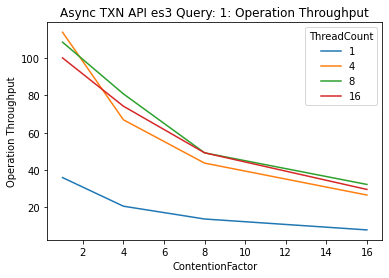

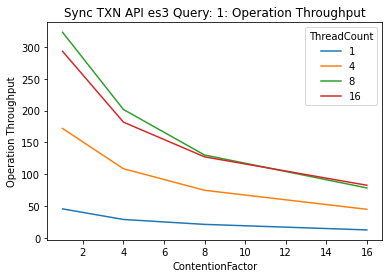

In [18]:
def plot_operation_throughput(file_name, title, query, experiment):
    # Make a pivot table for operation throughput for query and graph it
    pd = pandas.read_csv(file_name)
    pd1 = pd.query(f"QueryNumber == '{query}' & Experiment == '{experiment}'")
    piv = pd1.pivot(index='ContentionFactor', columns="ThreadCount", values="OperationThroughput")

    piv.plot(title=f"{title} {experiment} Query: {query}: Operation Throughput", ylabel="Operation Throughput")

plot_operation_throughput(csv_orig_file, "Async TXN API", "1", "es3")
plot_operation_throughput(csv_new_file, "Sync TXN API", "1", "es3")


In [ ]:
# Make a pivot table for average latency for query and graph it
pd = pandas.read_csv(csv_file)
pd1 = pd.query("QueryNumber == '2' & Experiment == 'es3'")
piv = pd1.pivot(index='ContentionFactor', columns="ThreadCount", values="AverageLatencyMillis")
piv.plot(title="ES3 Query 2: Average Latency", ylabel="Average Latency (ms)")


In [ ]:
# Make a pivot table for average latency for query and graph it
pd = pandas.read_csv(csv_file)
pd1 = pd.query("QueryNumber == '2' & Experiment == 'es3'")
piv = pd1.pivot(index='ContentionFactor', columns="ThreadCount", values="OperationThroughput")
piv.plot(title="ES3 Query 2: Operation Throughput", ylabel="Operation Throughput")